# Sumber Dataset

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

## Penjelasan Fitur dan Variabel

Dataset ini memiliki 10 fitur diagnostik, ditambah dengan satu variabel ID:

* **Sample code number**: Ini adalah nomor identifikasi unik untuk setiap sampel.
* **Clump Thickness**: Menggambarkan seberapa tebal gumpalan sel. Nilainya berkisar dari 1 hingga 10, dengan 1 menunjukkan sel-sel tersebar dan 10 menunjukkan sel-sel yang sangat berkerumun.
* **Uniformity of Cell Size**: Menilai keseragaman ukuran sel dalam sampel. Nilai 1 menunjukkan sel-sel yang seragam, sedangkan 10 menunjukkan variasi ukuran sel yang besar.
* **Uniformity of Cell Shape**: Menilai keseragaman bentuk sel dalam sampel. Mirip dengan ukuran sel, 1 menunjukkan bentuk sel yang seragam, dan 10 menunjukkan variasi bentuk sel yang signifikan.
* **Marginal Adhesion**: Mengukur kecenderungan sel untuk menempel satu sama lain pada batas gumpalan. Nilai 1 berarti sel-sel tidak banyak menempel, dan 10 berarti adhesi marginal tinggi.
* **Single Epithelial Cell Size**: Mengacu pada ukuran sel epitel tunggal. Nilai dari 1 hingga 10, di mana 1 adalah sel kecil dan 10 adalah sel besar.
* **Bare Nuclei**: Menunjukkan jumlah inti sel yang tidak tertutup oleh sitoplasma (inti telanjang). Nilai 1 hingga 10, di mana 1 menunjukkan tidak ada inti telanjang dan 10 menunjukkan banyak.
* **Bland Chromatin**: Mengukur tekstur kromatin (materi genetik dalam nukleus). Nilai 1 adalah kromatin halus, sedangkan 10 adalah kromatin kasar yang tidak teratur.
* **Normal Nucleoli**: Menilai jumlah nukleoli yang menonjol (struktur di dalam inti sel). Nilai 1 adalah nukleoli tidak terlihat atau normal, dan 10 menunjukkan nukleoli yang besar dan banyak.
* **Mitoses**: Mengukur jumlah pembelahan sel (mitosis) yang terlihat. Nilai 1 menunjukkan sedikit atau tidak ada mitosis, dan 10 menunjukkan tingkat pembelahan sel yang tinggi.


In [ ]:
!pip3 install -U ucimlrepo

### Kualitas Data dan Visualisasi:

In [ ]:
import pandas as pd

# Baca CSV lokal hasil ekstraksi
data = pd.read_csv("breast-cancer-wisconsin.csv", header=None)

# Tambahkan nama kolom sesuai dokumentasi UCI
data.columns = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

# Simpan ulang ke CSV dengan header dan index
data.to_csv("breast_cancer_wisconsin_named.csv", index=True)

# Tampilkan info dan 5 baris pertama
print(data.info())
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025         

In [ ]:
display(data) #display dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


<Figure size 1500x1000 with 0 Axes>

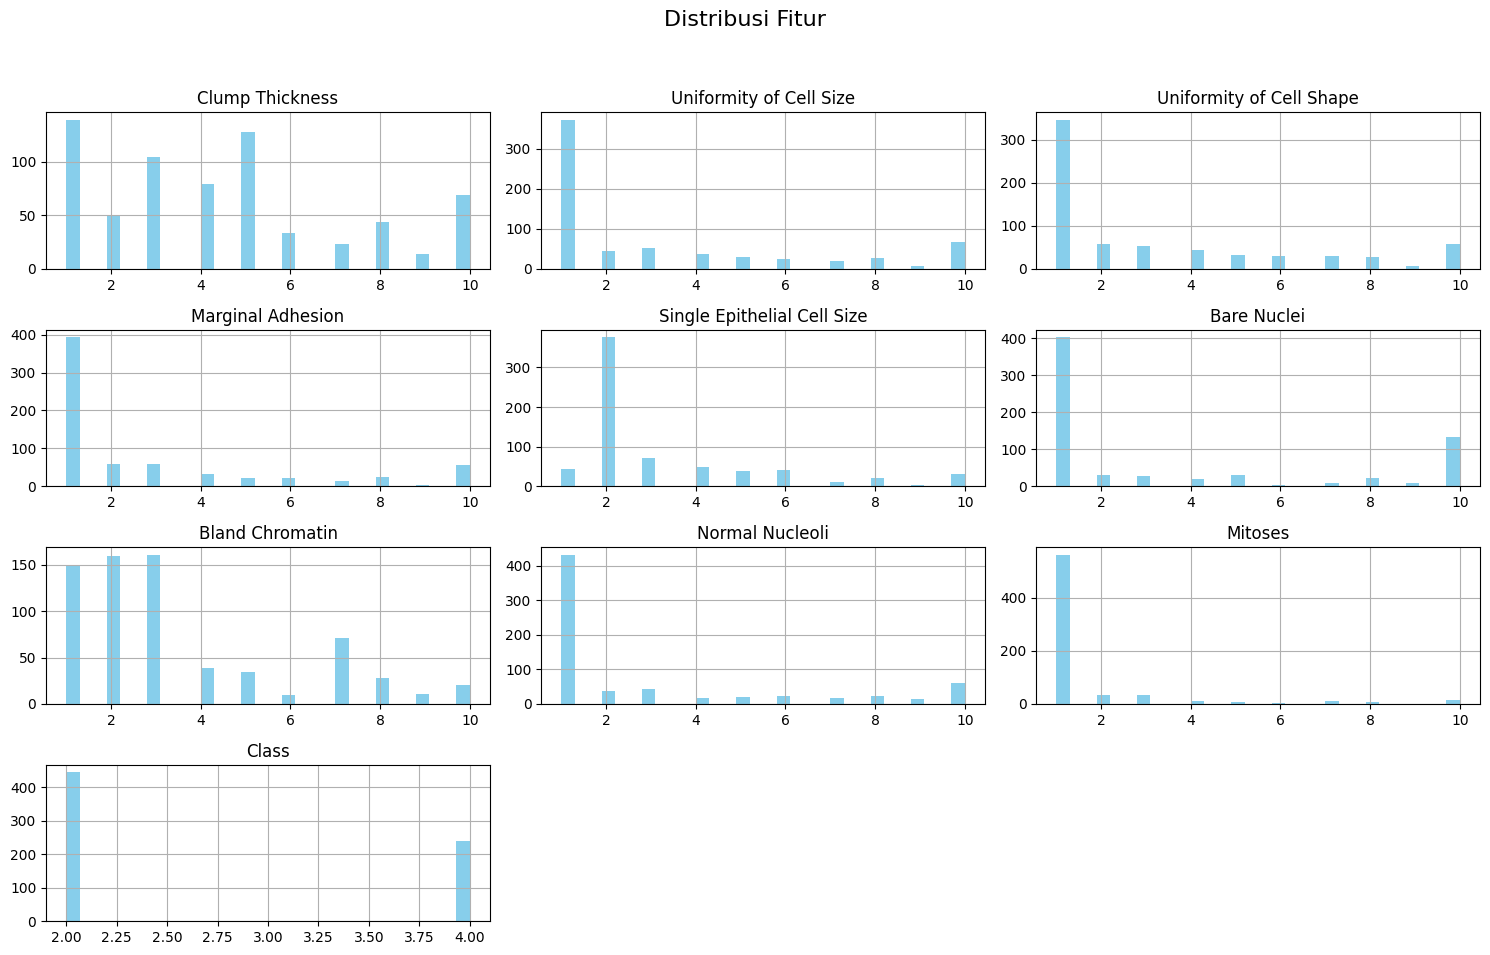

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data dan beri nama kolom (kalau belum)
data = pd.read_csv("breast-cancer-wisconsin.csv", header=None)
data.columns = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

# Konversi kolom 'Bare Nuclei' ke numerik (ada nilai '?')
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"], errors='coerce')

# Buang baris yang ada NaN (karena nilai '?')
data = data.dropna()

# Visualisasi distribusi fitur-fitur
plt.figure(figsize=(15, 10))
data.drop(columns=["Sample code number"]).hist(bins=30, color='skyblue', figsize=(15, 10))
plt.suptitle('Distribusi Fitur', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Struktur Dataset

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(683, 11)

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

,0
Sample code number,int64
Clump Thickness,int64
Uniformity of Cell Size,int64
Uniformity of Cell Shape,int64
Marginal Adhesion,int64
Single Epithelial Cell Size,int64
Bare Nuclei,float64
Bland Chromatin,int64
Normal Nucleoli,int64
Mitoses,int64


In [ ]:
import pandas as pd

# Buat label diagnosis dalam bentuk teks agar mudah dibaca
data['Diagnosis'] = data['Class'].map({2: 'Benign', 4: 'Malignant'})

# Hitung jumlah sampel per kelas diagnosis
print(data.groupby('Diagnosis').size())


Diagnosis
Benign       458
Malignant    241
dtype: int64


Akurasi: 0.9708029197080292

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97        79
           4       0.98      0.95      0.96        58

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



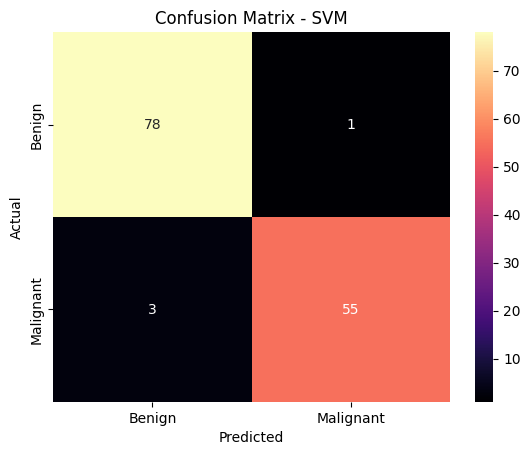

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
data = pd.read_csv("breast-cancer-wisconsin.csv", header=None)
data.columns = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

# 2. Preprocessing
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"], errors='coerce')
data = data.dropna()
X = data.drop(columns=["Sample code number", "Class"])
y = data["Class"]

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. SVM Model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = svm_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


Akurasi: 0.9197080291970803

Classification Report:
               precision    recall  f1-score   support

           2       0.90      0.97      0.93        79
           4       0.96      0.84      0.90        58

    accuracy                           0.92       137
   macro avg       0.93      0.91      0.92       137
weighted avg       0.92      0.92      0.92       137



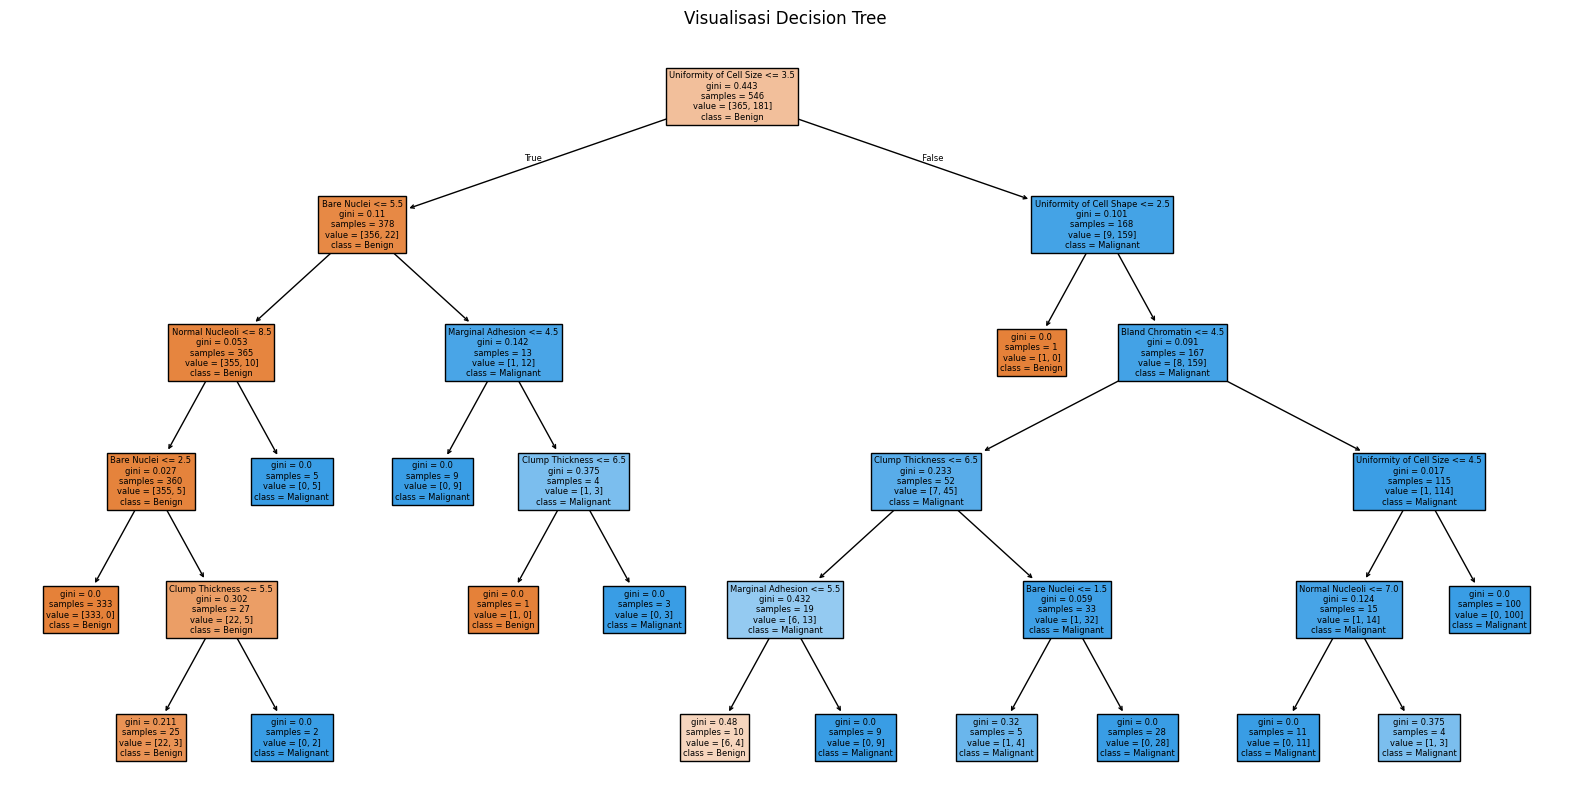

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dan siapkan data
data = pd.read_csv("breast-cancer-wisconsin.csv", header=None)
data.columns = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size",
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

# 2. Preprocessing
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"], errors='coerce')
data = data.dropna()
X = data.drop(columns=["Sample code number", "Class"])
y = data["Class"]

# 3. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Latih model Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 5. Evaluasi model
y_pred = dt_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Visualisasi pohon keputusan (opsional)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()
